# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Analysis-of-dice-rolls." data-toc-modified-id="Analysis-of-dice-rolls.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of dice rolls.</a></div><div class="lev1 toc-item"><a href="#Playing-with-Widgets" data-toc-modified-id="Playing-with-Widgets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Playing with Widgets</a></div>

# Analysis of dice rolls.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import widgets, interact

- Create a dice.
    - Default: 6 side, but can be n > 2 sides.
    - Output: An `Int`
- Create a Trial
    - Default: 100 rolls, but can be n.
    - Output:
        - rollsList: Array with all of the roll results.
        - cumltList: Array with the cumulative probability.

In [2]:
def dice(num_of_sides = 6, loaded_num = 1, loaded_weight = 1):
    '''
    Virtual dice with output of a side. Default is an equally weighted dice. 
    Input:
         num_of_sides: Number of sides for the dice. (Default = 6)
         loaded_num  : The number that is biased or "loaded". (Default = 1)
         loaded_wght : Number used to get loaded weight. (Default = 1)
                       For equal weight distribution, the loaded number has
                       the same probability as any other dice number. (1/6, 1/3,..., 1/n) 
    
    Output: Int value corresponding to a side of the dice.
    
    Example:
        [dice(10, 7, 9) for output in range(20)] -> [7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 1, 7, 7, 7]
        [dice(6, 5, 3) for output in range(20)] -> [5, 5, 6, 5, 6, 5, 2, 6, 5, 2, 4, 6, 6, 5, 2, 3, 5, 5, 6, 5]
    '''
    
    if loaded_num > num_of_sides:
        raise ValueError('The loaded number chosen is greater than the total number of sides on the dice!')
    elif loaded_weight > num_of_sides:
        raise ValueError('The loaded weight chosen is greater than the total number of sides on the dice!')
    elif num_of_sides < 1:
        raise ValueError('Total number of sides is less than one!')
            
    sides = [num for num in range(1, num_of_sides+1)]
    return np.random.choice(sides, p=wght(num_of_sides, loaded_num, loaded_weight))


def wght(num_of_sides = 6, loaded_num = 1, loaded_weight = 1):
    '''
     Weight function for the probabilities of a side on a roll.
     Input:
         num_of_sides: Number of sides for the dice. (Default = 6)
         loaded_num  : The number that is biased or "loaded". (Default = 1)
         loaded_wght : Number used to get loaded weight. (Default = 1)
                       For equal weight distribution, the loaded number has
                       the same probability as any other dice number. (1/6, 1/3,..., 1/n)
     
     Output: List of corresponding weights for each side.
     
     Example:
         Dice with 10 sides, loaded number to be 4, and the loaded weight to be 
         the chance of 3/10(rather than 1/10): 
         
         wght(10, 4, 3) -> [0.07777777777777778, 0.07777777777777778, 0.07777777777777778,
                            0.3,0.07777777777777778, 0.07777777777777778, 0.07777777777777778, 0.07777777777777778,
                            0.07777777777777778, 0.07777777777777778]
    '''
    
    if loaded_weight == 1:
        return [1/num_of_sides]*len(range(num_of_sides))
    
    ld_wght = loaded_weight/num_of_sides
    wght_list = [(1-ld_wght)/(num_of_sides-1)]*len(range(num_of_sides))
    wght_list[loaded_num-1] = ld_wght
    
    return wght_list


def trials(num_of_trials=100, num_of_sides=6, loaded_num=1, loaded_weight=1):
    '''
    Trials consisting of a specified number of time the dice will be rolled. Output gives
    a list of all the rolled values and a list of cumulative proportion per roll.
    
    Input:
         num_of_trials: Number of rolls. (Default = 100)
         num_of_sides : Number of sides for the dice. (Default = 6)
         loaded_num   : The number that is biased or "loaded". (Default = 1)
         loaded_wght  : Number used to get loaded weight. (Default = 1)
                       For equal weight distribution, the loaded number has
                       the same probability as any other dice number. (1/6, 1/3,..., 1/n)
    Output: (In this order.)
         rollsList: List of rolled values. Length equal to the num_of_trials input.
         cumltList: List of cumulative proportion per roll. 
    '''

    sides = list(range(1, num_of_sides+1))
    rollsList = []
    
    cumltList = [[] for side in range(num_of_sides)]
    cumlt     = [0 for side in range(num_of_sides)]
    
    for trial in range(num_of_trials):
        roll = dice(num_of_sides, loaded_num, loaded_weight)
        rollsList.append(roll)
        
        for side in sides:
            if roll == side:
                cumlt[side-1] += 1
                
            cumltList[side-1].append(cumlt[side-1]/(trial+1))
            
    return rollsList, cumltList


In [3]:
def simu_dice(num_of_trials = 100, num_of_sides = 6, loaded_num = 1, loaded_wght = 1, \
              plt_style = 'seaborn-ticks', cuml_tot = True, ret = False):
    rolls, cuml = trials(num_of_trials, num_of_sides, loaded_num, loaded_wght)

    plt.style.use(style=plt_style) 
    
    if cuml_tot is True:
        for side in cuml:
            ax = plt.plot(np.array([num+1 for num in range(len(rolls))]), np.array(side), \
                          label = 'Side {}'.format(cuml.index(side) + 1))    
    else:
        ax = plt.plot(np.array([num+1 for num in range(len(rolls))]), np.array(cuml[loaded_num-1]), \
                          label = 'Side {}'.format(cuml.index(cuml[loaded_num-1]) + 1))
        
        
    ax = plt.plot([num+1 for num in range(len(rolls))], np.array([1/num_of_sides]*len(rolls)), \
                       color = 'k', linewidth = 2, label = 'Theoretical \n Probability')
    ax = plt.title(plt_style)
    ax = plt.legend()
    ax = plt.ylim(0.0, 1.0)
    ax = plt.xlabel('# of Trials')
    ax = plt.ylabel('Cumulative Proportions')
    
    plt.show()
    
    if ret is True:
        return rolls, cuml

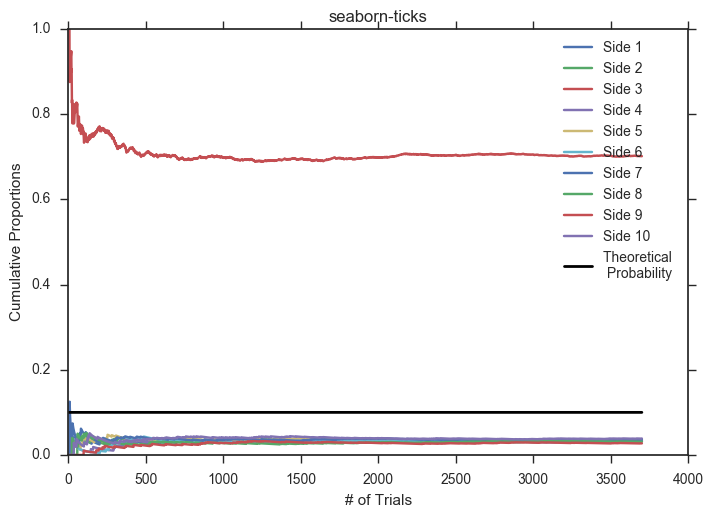

In [5]:
num_of_sides  = widgets.IntSlider(6, 1, 25, 1)

interact(simu_dice, \
        num_of_sides  = widgets.IntSlider(6, 1, 25, 1)                                 ,\
        num_of_trials = widgets.IntSlider(100, 0, 100000, 100)                         ,\
        loaded_num    = widgets.IntSlider(1, 1, num_of_sides.max, 1)                   ,\
        loaded_wght   = widgets.IntSlider(1, 1, num_of_sides.max, 1)                   ,\
        plt_style     = tuple(style for style in plt.style.available) ,\
        cuml_tot      = True                                          ,\
        ret           = widgets.fixed(False)
        );

# Playing with Widgets

In [ ]:
from ipywidgets import widgets
from ipywidgets import interact
from IPython.display import display

In [ ]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print('Butters')
    
text.on_submit(handle_submit)

In [ ]:
button = widgets.Button(description = 'Click me!')
display(button)

def on_button_click(b):
    print('Button clicked!')
    
button.on_click(on_button_click)

In [ ]:
def f(x, y):
    print(x)
    print(y)
    
sld = interact(f, x=100, y=50)
chk = interact(f, x=True, y=False)
txt = interact(f, x='Suren', y='Butters') 

In [ ]:
outputText = widgets.Text()
outputText

In [ ]:
inputText = widgets.Text()

def makeUpperCase(sender):
    outputText.value = inputText.value.upper()
    
inputText.on_submit(makeUpperCase)
inputText

In [ ]:
t = np.arange(0.0, 1.1, .01)

def pltSin(A, f):
    plt.plot(t, A*np.sin(2*np.pi*t*f))
    plt.axis([0, 1, -10, 10])
    plt.autoscale(False)
    plt.show()


interact(pltSin, A = widgets.IntSlider(1, 0, 10, 1), f = widgets.FloatSlider(1, min=0, max=10, step=1))